# LAB5 KNN Classification on Diabetes Part3

 In this part I will use the diabetes dataset and create a KNN classifier. Tune the parameter K to find the optimal K for the classification task. Then perform k-fold cross validation, find the best k that minimizes the misclassification rate. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from sklearn.datasets import load_breast_cancer
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.patches as mpatches
import operator
from matplotlib.lines import Line2D
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('diabetes.csv')

### Data Manuplation

In [3]:
#diabetes.columns =['x1', 'x2', 'x3','x4','x5','x6','x7','x8','k'] 
df.columns =['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','c'] 

In [4]:
df['c'].replace({0: 'A', 1:'B'}, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,c
0,1,85,66,29,0,26.6,0.351,31,A
1,8,183,64,0,0,23.3,0.672,32,B
2,1,89,66,23,94,28.1,0.167,21,A
3,0,137,40,35,168,43.1,2.288,33,B
4,5,116,74,0,0,25.6,0.201,30,A
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,A
763,2,122,70,27,0,36.8,0.340,27,A
764,5,121,72,23,112,26.2,0.245,30,A
765,1,126,60,0,0,30.1,0.349,47,B


Pregnancies: x1  
Glucose: x2  
BloodPressure: x3  
SkinThickness: x4  
Insulin: x5  
BMI: x6  
DiabetesPedigreeFunction: x7  
Age: x8  
Outcome: k (class) 

In [5]:
df.c

0      A
1      B
2      A
3      B
4      A
      ..
762    A
763    A
764    A
765    B
766    A
Name: c, Length: 767, dtype: object

In [6]:
df_array = df.to_numpy()
df_array

array([[1, 85, 66, ..., 0.35100000000000003, 31, 'A'],
       [8, 183, 64, ..., 0.672, 32, 'B'],
       [1, 89, 66, ..., 0.16699999999999998, 21, 'A'],
       ...,
       [5, 121, 72, ..., 0.245, 30, 'A'],
       [1, 126, 60, ..., 0.349, 47, 'B'],
       [1, 93, 70, ..., 0.315, 23, 'A']], dtype=object)

In [7]:
df_array[:,:8]  #all features except c, select all columns

array([[1, 85, 66, ..., 26.6, 0.35100000000000003, 31],
       [8, 183, 64, ..., 23.3, 0.672, 32],
       [1, 89, 66, ..., 28.1, 0.16699999999999998, 21],
       ...,
       [5, 121, 72, ..., 26.2, 0.245, 30],
       [1, 126, 60, ..., 30.1, 0.349, 47],
       [1, 93, 70, ..., 30.4, 0.315, 23]], dtype=object)

In [8]:
df_array[:,[0,3]] #selecting specific features, ex: first feature and forth feature

array([[1, 29],
       [8, 0],
       [1, 23],
       ...,
       [5, 23],
       [1, 0],
       [1, 31]], dtype=object)

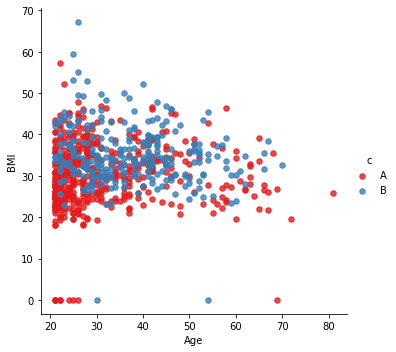

In [9]:
sns.lmplot('Age','BMI',data=df,hue='c',palette='Set1',fit_reg=False,scatter_kws={"s":30})
plt.show()

In [10]:
#--- To calculate the distance between two points---#
def euclidean_distance(pt1,pt2,dimension):
    distance=0
    for x in range(dimension):
        distance += np.square(pt1[x]-pt2[x])
    return np.sqrt(distance)

In [11]:
#---our own KNN model---#
def knn(training_points,test_point,k):
    distances={}
    
    #---the number of axes we are dealing with---#
    dimension = test_point.shape[1]

    #---calculating euclidean distance between each point
    # in the training data and test data
    for x in range(len(training_points)):
        dist= euclidean_distance(test_point,training_points.iloc[x],dimension)
        
        #--- record the distance for each training points---# 
        distances[x]=dist[0]
        
    #---sort the distances---#
    sorted_d=sorted(distances.items(),key=operator.itemgetter(1)) 
    
    #---to store the neighbors---#
    neighbors=[]
    
    #---extract the top k neighbors---#
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    
    #---for each neighbor found, find its class---#
    class_counter={}
    for x in range(len(neighbors)):
        #---find out the class for that particular point---#
        cls=training_points.iloc[neighbors[x]][-1]                                      
        
        if cls in class_counter:
            class_counter[cls] += 1
        else:
            class_counter[cls]=1
            
        #---sort the class_counter in descending order---#
        sorted_counter=sorted(class_counter.items(), key=operator.itemgetter(1),reverse=True)
        
    #---return the class with the most count, as well as the neighbors found---#
    return(sorted_counter[0][0],neighbors)

In [12]:
test_set=[[30,40]]                        #test_set[Age, BMI]
test=pd.DataFrame(test_set)

#Choose features specifically in datafram for passing to knn func.
cls,neighbors=knn(df[["Age", "BMI", "c"]],test,3)                             #knn(training_points, test_points, k)
print("Predicted Class:" + cls)
#print(len(neighbors))

Predicted Class:A


In [13]:
#---Test Point---#
#test_set=[[32,23]]                        #test_set[Age, BMI]
#test=pd.DataFrame(test_set)
#cls,neighbors=knn(df,test,3)        # This is an issue
#print("Predicted Class:" + cls)

Issue was my passing points in function was bit off.

### Visualizing Different Values of K
It is useful to be able to visualize the ffect of applying various values of k. The following code snippet draws a series of concentric circles around the test point based on the values of k, which range from 7 to 1, with intervals of -2:

In [14]:
df = pd.read_csv('diabetes.csv')
df.columns =['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','c'] 
df_array = df.to_numpy()
df_array[:,:8]

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 2.33e+01, 6.72e-01, 3.20e+01],
       [1.00e+00, 8.90e+01, 6.60e+01, ..., 2.81e+01, 1.67e-01, 2.10e+01],
       ...,
       [5.00e+00, 1.21e+02, 7.20e+01, ..., 2.62e+01, 2.45e-01, 3.00e+01],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.01e+01, 3.49e-01, 4.70e+01],
       [1.00e+00, 9.30e+01, 7.00e+01, ..., 3.04e+01, 3.15e-01, 2.30e+01]])

In [15]:
#display(X)

In [16]:
#display(y)

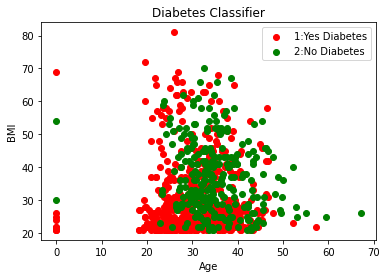

In [17]:
%matplotlib inline

datasets = df_array
X=df_array[:,[5,7]]                  ####### take the "Age" and "BMI" features
y=df.c # k = target (classes)

colors=['red','green',]

for color, i, k in zip(colors,[0,1],df.c):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=i+1)

plt.xlabel('Age')
plt.ylabel('BMI')

#custom = [Line2D([], [], marker='.', color='r', linestyle='None'), Line2D([], [], marker='.', color='g', linestyle='None')]

#plt.legend(custom, ['Yes', 'No'], loc='lower right')
plt.legend(["1:Yes Diabetes","2:No Diabetes"], loc='best', shadow=False, scatterpoints=1)

plt.title("Diabetes Classifier")
plt.show()


(array([0, 1]), array([515, 252]))


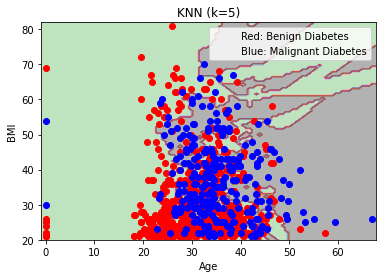

In [18]:
from sklearn.neighbors import KNeighborsClassifier

k=5
#---instantiate learning model---#
knn=KNeighborsClassifier(n_neighbors=k)
#---fitting the model---#
knn.fit(X,y)

#---min and max for the first feature---#
x_min, x_max=X[:,0].min()-1,X[:,0].max() + 1

#---min and max for the second feature---#
y_min, y_max=X[:,1].min()-1, X[:,1].max() + 1

#---step size in mesh---#
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---#
xx,yy=np.meshgrid(np.arange(x_min,x_max,abs(h)),
                  np.arange(y_min,y_max,abs(h)))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw the result using a color plot---#
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Accent,alpha=0.5)

#---plot the training points---#
colors=['red','blue']
for color, i, k in zip(colors,[0,1],df.c):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=i+1)

plt.xlabel('Age')
plt.ylabel('BMI')

plt.title(f'KNN (k=5)')

plt.legend(["Red: Benign Diabetes","Blue: Malignant Diabetes"], loc='best', shadow=False, scatterpoints=1)

predictions=knn.predict(X)

#---classifications based on predictions---#
print(np.unique(predictions,return_counts=True))


(array([0, 1]), array([525, 242]))


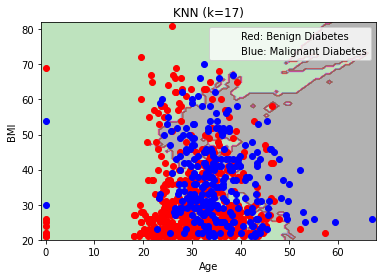

In [19]:
from sklearn.neighbors import KNeighborsClassifier

k=17
#---instantiate learning model---#
knn=KNeighborsClassifier(n_neighbors=k)
#---fitting the model---#
knn.fit(X,y)

#---min and max for the first feature---#
x_min, x_max=X[:,0].min()-1,X[:,0].max() + 1

#---min and max for the second feature---#
y_min, y_max=X[:,1].min()-1, X[:,1].max() + 1

#---step size in mesh---#
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---#
xx,yy=np.meshgrid(np.arange(x_min,x_max,abs(h)),
                  np.arange(y_min,y_max,abs(h)))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw the result using a color plot---#
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Accent,alpha=0.5)

#---plot the training points---#
colors=['red','blue']
for color, i, k in zip(colors,[0,1],df.c):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=i+1)

plt.xlabel('Age')
plt.ylabel('BMI')

plt.title(f'KNN (k=17)')

plt.legend(["Red: Benign Diabetes","Blue: Malignant Diabetes"], loc='best', shadow=False, scatterpoints=1)

predictions=knn.predict(X)

#---classifications based on predictions---#
print(np.unique(predictions,return_counts=True))


note that as k increases, the boundary becomes smoother. But it also means that the more points will be classified incorrectly. When k increases to a large value, underfitting occurs. 

### Cross-Validation
We have witnessed from previous chapters, that we split our dataset into two individual sets--one for training ando ne for testing. However, the data in your dataset may not be distributed evenly, and as a result your test set may be too simple or too hard to predict, thereby making it very difficult to know if your model works well.

Instead of using part of the data for training and part for testing, you can split the data into k-folds and train the model k times, rotating the training and testing sets, By doing so, each data point is now being used for training and testing.

#### Parameter-Tuning K
Now that you understand cross-validation, lets use it on our Iris dataset. We will train the model using all of the three features, and as the same time we shall use cross-validation on the dataset using 10 folds. We will do this for each value of k:

In [20]:
#---holds the cv (cross-validates) scores---#
cv_scores=[]

#---use all features---#
X=df_array[:,:8]               #### select all features except c, select all columns
#X=df_array[:,[5,7]]           #### select Age and BMI
y=df.c # k = target (classes)

#---number of folds---#
folds=10

#---creating odd list of K for KNN---#
ks=list(range(1,int(len(X)*((folds-1)/folds))))

#---remove all multiples of 3---#
ks=[ck for ck in ks if ck % 3 !=0]

#---perform k-fold cross-validation---#
for k in ks:
    knn=KNeighborsClassifier(n_neighbors=k)
    
    #---performs cross-validation and returns the average accuracy---#
    scores= cross_val_score(knn,X,y,cv=folds,scoring='accuracy')
    mean=scores.mean()
    cv_scores.append(mean)
    print('K value: ', k, 'Average Accuracy: ', mean)
    

K value:  1 Average Accuracy:  0.6806390977443609
K value:  2 Average Accuracy:  0.7105775803144223
K value:  4 Average Accuracy:  0.7197368421052632
K value:  5 Average Accuracy:  0.7249999999999999
K value:  7 Average Accuracy:  0.7432843472317157
K value:  8 Average Accuracy:  0.7380553656869446
K value:  10 Average Accuracy:  0.7484278879015721
K value:  11 Average Accuracy:  0.7380211893369788
K value:  13 Average Accuracy:  0.7471291866028709
K value:  14 Average Accuracy:  0.7549555707450445
K value:  16 Average Accuracy:  0.7510765550239235
K value:  17 Average Accuracy:  0.7550922761449078
K value:  19 Average Accuracy:  0.7485645933014354
K value:  20 Average Accuracy:  0.7524606971975393
K value:  22 Average Accuracy:  0.7525119617224881
K value:  23 Average Accuracy:  0.7499145591250855
K value:  25 Average Accuracy:  0.7472488038277513
K value:  26 Average Accuracy:  0.7342105263157894
K value:  28 Average Accuracy:  0.7289644565960355
K value:  29 Average Accuracy:  0.732

K value:  242 Average Accuracy:  0.6519138755980862
K value:  244 Average Accuracy:  0.6519138755980862
K value:  245 Average Accuracy:  0.6519138755980862
K value:  247 Average Accuracy:  0.6519138755980862
K value:  248 Average Accuracy:  0.6519138755980862
K value:  250 Average Accuracy:  0.6519138755980862
K value:  251 Average Accuracy:  0.6519138755980862
K value:  253 Average Accuracy:  0.6519138755980862
K value:  254 Average Accuracy:  0.6519138755980862
K value:  256 Average Accuracy:  0.6519138755980862
K value:  257 Average Accuracy:  0.6519138755980862
K value:  259 Average Accuracy:  0.6519138755980862
K value:  260 Average Accuracy:  0.6519138755980862
K value:  262 Average Accuracy:  0.6519138755980862
K value:  263 Average Accuracy:  0.6519138755980862
K value:  265 Average Accuracy:  0.6519138755980862
K value:  266 Average Accuracy:  0.6519138755980862
K value:  268 Average Accuracy:  0.6519138755980862
K value:  269 Average Accuracy:  0.6519138755980862
K value:  27

K value:  479 Average Accuracy:  0.6519138755980862
K value:  481 Average Accuracy:  0.6519138755980862
K value:  482 Average Accuracy:  0.6519138755980862
K value:  484 Average Accuracy:  0.6519138755980862
K value:  485 Average Accuracy:  0.6519138755980862
K value:  487 Average Accuracy:  0.6519138755980862
K value:  488 Average Accuracy:  0.6519138755980862
K value:  490 Average Accuracy:  0.6519138755980862
K value:  491 Average Accuracy:  0.6519138755980862
K value:  493 Average Accuracy:  0.6519138755980862
K value:  494 Average Accuracy:  0.6519138755980862
K value:  496 Average Accuracy:  0.6519138755980862
K value:  497 Average Accuracy:  0.6519138755980862
K value:  499 Average Accuracy:  0.6519138755980862
K value:  500 Average Accuracy:  0.6519138755980862
K value:  502 Average Accuracy:  0.6519138755980862
K value:  503 Average Accuracy:  0.6519138755980862
K value:  505 Average Accuracy:  0.6519138755980862
K value:  506 Average Accuracy:  0.6519138755980862
K value:  50

In [21]:
print(ks)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110, 112, 113, 115, 116, 118, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134, 136, 137, 139, 140, 142, 143, 145, 146, 148, 149, 151, 152, 154, 155, 157, 158, 160, 161, 163, 164, 166, 167, 169, 170, 172, 173, 175, 176, 178, 179, 181, 182, 184, 185, 187, 188, 190, 191, 193, 194, 196, 197, 199, 200, 202, 203, 205, 206, 208, 209, 211, 212, 214, 215, 217, 218, 220, 221, 223, 224, 226, 227, 229, 230, 232, 233, 235, 236, 238, 239, 241, 242, 244, 245, 247, 248, 250, 251, 253, 254, 256, 257, 259, 260, 262, 263, 265, 266, 268, 269, 271, 272, 274, 275, 277, 278, 280, 281, 283, 284, 286, 287, 289, 290, 292, 293, 295, 296, 298, 299, 301, 302, 304, 305, 307, 308, 310, 311, 313, 314, 316, 317, 319, 320, 3

The optimal number of neighbors is 17
This is a simulation where I use all features 


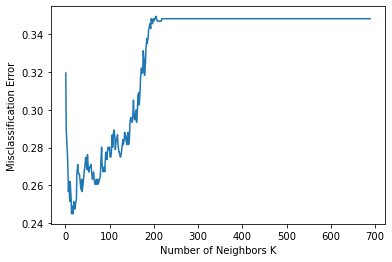

In [22]:
#---calculate misclassification error for each k---#
MSE=[1-x for x in cv_scores]

#---dtermining best k (min.MSE)---#
optimal_k=ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")
print('This is a simulation where I use all features ')

#---plot misclassification error vs k---#
plt.plot(ks,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# LAB5 KNN Classification on Diabetes Part4

For the KNN algorithm with the optimal K in part 4, calculate the accuracy, the precision and the recall. Also graph the ROC and estimate AUC. Use part 1 as a guide. Compare the KNN and the LR algorithms. Which one performs better as a classifier for diabetes prediction. Include a table that compares the accuracy metrics of the two algorithms


In [23]:
X=df_array[:,:8]           #### select All
y=df.c # k = target (classes)

### 2. Evaluation procedure 2 - Train/test split¶

1. Split the dataset into two pieces: a training set and a testing set.  
2. Train the model on the training set.  
3. Test the model on the testing set, and evaluate how well we did.  

In [24]:
# print the shapes of X and y
# X is our features matrix with 150 x 4 dimension
print(X.shape)
# y is our response vector with 150 x 1 dimension
print(y.shape)

(767, 8)
(767,)


In [25]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                         X, 
                         y, 
                         test_size=0.4, 
                         random_state=2)

X_train = train_set   
X_test = test_set  
y_train = train_labels  
y_test = test_labels

- test_size=0.4
40% of observations to test set  
60% of observations to training set  


- data is randomly assigned unless you use random_state hyperparameter
If you use random_state=4  
Your data will be split exactly the same way  

In [26]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(460, 8)
(307, 8)


In [27]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(460,)
(307,)


In [44]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("--- Accuracy ---- k = 5")
print(metrics.accuracy_score(y_test, y_pred))

--- Accuracy ---- k = 5
0.7361563517915309


In [29]:
knn = KNeighborsClassifier(n_neighbors=30) # choose k 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("--- Accuracy ---- k = 30")

print(metrics.accuracy_score(y_test, y_pred))

--- Accuracy ---- k = 30
0.7719869706840391


In [30]:
# try K=1 through K=n and record testing accuracy
k_range = range(1, 40)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to something
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.6677524429967426, 0.6872964169381107, 0.6644951140065146, 0.7035830618892508, 0.7133550488599348, 0.7035830618892508, 0.7035830618892508, 0.7263843648208469, 0.7328990228013029, 0.7263843648208469, 0.752442996742671, 0.7328990228013029, 0.7296416938110749, 0.7328990228013029, 0.7231270358306189, 0.7361563517915309, 0.7361563517915309, 0.739413680781759, 0.755700325732899, 0.749185667752443, 0.7361563517915309, 0.745928338762215, 0.742671009771987, 0.752442996742671, 0.749185667752443, 0.752442996742671, 0.762214983713355, 0.762214983713355, 0.762214983713355, 0.7719869706840391, 0.749185667752443, 0.749185667752443, 0.745928338762215, 0.745928338762215, 0.745928338762215, 0.758957654723127, 0.758957654723127, 0.755700325732899, 0.745928338762215]


Text(0, 0.5, 'Testing Accuracy')

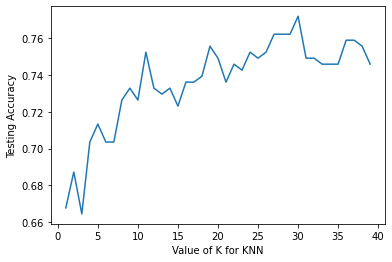

In [31]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

- Training accuracy rises as model complexity increases  
- Testing accuracy penalizes models that are too complex or not complex enough  
- For KNN models, complexity is determined by the value of K (lower value = more complex)  

In [32]:
# get a predicted probabilities and convert into a dataframe
preds_prob = pd.DataFrame(knn.predict_proba(X_test))

In [33]:
# assign column names to prediction
preds_prob.columns = ["Malignant", "Benign"]

In [34]:
# get the predicted class labels
preds = knn.predict(X_test)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

In [35]:
# actual diagnosis
original_result = pd.DataFrame(y_test)
original_result.columns = ["Original Result"]

In [36]:
# Merge the three dataframes into one
result = pd.concat([preds_prob, preds_class, original_result], axis =1)
print(result.head())

   Malignant    Benign  Prediction  Original Result
0   0.948718  0.051282         0.0              NaN
1   0.948718  0.051282         0.0              1.0
2   0.820513  0.179487         0.0              NaN
3   0.256410  0.743590         1.0              1.0
4   0.974359  0.025641         0.0              NaN


### Getting the Confusion Matrix

In [37]:
# generate table of predictions vs actual
print("--- confusion Matrix ---")
print(pd.crosstab(preds, y_test))

--- confusion Matrix ---
c        0   1
row_0         
0      175  52
1       26  54


In [38]:
# --- view the confusion matrix -- 
print(metrics.confusion_matrix(y_true = y_test,
                               y_pred = preds))

[[175  26]
 [ 52  54]]


In [39]:
# View summary of common classfication metrics
print("--- Metrices----")

print(metrics.classification_report(
      y_true = y_test,
      y_pred = preds))

--- Metrices----
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       201
           1       0.68      0.51      0.58       106

    accuracy                           0.75       307
   macro avg       0.72      0.69      0.70       307
weighted avg       0.74      0.75      0.74       307



### Receiving Operating Characteristic (ROC) Curve

In [40]:
# find the predicted probabilities using the test set

probs = knn.predict_proba(X_test)
preds = probs[:,1]

# find the FPR, TPR, and threshold
fpr, tpr, threshold  = roc_curve(y_test, preds)


In [41]:
print(fpr)
print(tpr)
print(threshold)

[0.         0.         0.         0.00995025 0.01492537 0.02487562
 0.02985075 0.03482587 0.07462687 0.09452736 0.12935323 0.15920398
 0.17910448 0.26865672 0.30348259 0.35323383 0.39303483 0.43781095
 0.46766169 0.51741294 0.54726368 0.5721393  0.64676617 0.68159204
 0.83084577 0.89552239 0.94527363 1.        ]
[0.         0.00943396 0.05660377 0.10377358 0.13207547 0.1509434
 0.19811321 0.22641509 0.35849057 0.46226415 0.50943396 0.56603774
 0.59433962 0.66981132 0.71698113 0.75471698 0.81132075 0.8490566
 0.87735849 0.90566038 0.93396226 0.95283019 0.95283019 0.96226415
 0.98113208 0.99056604 1.         1.        ]
[1.76923077 0.76923077 0.74358974 0.69230769 0.66666667 0.64102564
 0.61538462 0.58974359 0.56410256 0.53846154 0.51282051 0.48717949
 0.46153846 0.41025641 0.38461538 0.35897436 0.33333333 0.30769231
 0.28205128 0.25641026 0.23076923 0.20512821 0.17948718 0.15384615
 0.1025641  0.07692308 0.05128205 0.02564103]


### Plotting the ROC and Finding the Area Under the Curve (AUC)


In [42]:
# find the area under the curve
roc_auc = auc(fpr, tpr)

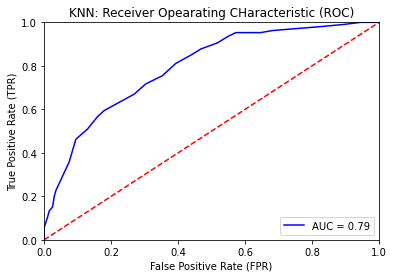

In [43]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('KNN: Receiver Opearating CHaracteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

# Report:
#### Accuracy
LR:0.78,                  vs   KNN(k=30): 0.77 
#### Precision  
LR:0.79(0), 0.77(1)   vs    KNN: 0.63(0), 0.30(1)
#### Recall
LR:0.91(0), 0.54(1)   vs   KNN: 0.67(0), 0.26(1)
#### AUC value
LR:0.86,                  vs    KNN: 0.45 
